<a href="https://colab.research.google.com/github/hansglick/book_errata/blob/main/p023_Decoding_Strategies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


# Overview
Dans les modèles autorégressifs comme les RNN, les transformers, etc. l'output du token t dépend de l'output du token t-1. Il existe donc différentes stratégies de décodage puisqu'un output a une incidence sur tout le reste de la séquence décodée. url : https://www.tensorflow.org/text/guide/decoding_api

____
# Greddy Method

##### Algorithme
C'est la méthode la plus naïve. Pour chaque timestemp t, on output le token le plus probable tout simplement. Cette méthode ne marche pas très bien, généralement car elle est beaucoup trop contrainte et rate certaines sous séquences beaucoup plus probable.

##### Schéma

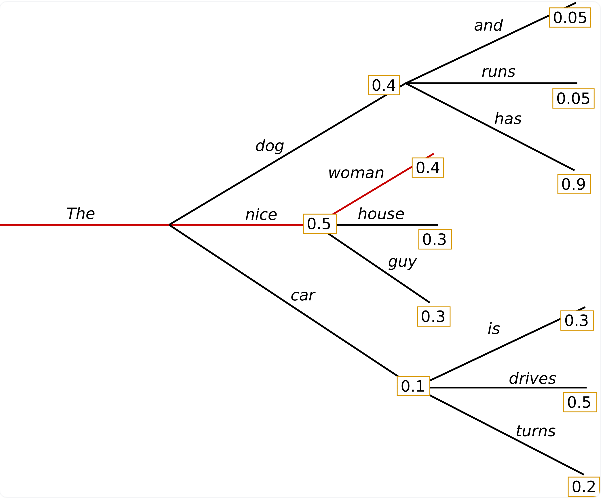

____

# Beam Search

##### *Algorithme*
C'est une méthode qui consiste à tracker B séquences prédites tout au long du décodage. L'algorithme se déroule ainsi :

 1. 1er mot à générer/prédire : On garde les B mots les plus probables. On les appelle les B1
 2. 2eme mot à générer/prédire : On garde les B sous séquences les plus probables dont les premiers mots étaient les B1. On appelle ces B sous-séquences les B2
 3. 3eme mot à générer/prédire : On garde les B sous séquences les plus probables dont les premiers mots sont constitués par les B2
 4. Ainsi de suite

##### *Bonnes pratiques*

 * On doit tracker des probabilités conditionnelles qui sont représentées par des produits de probabilités. Par exemple Pt=2(cat) = P(the) * P(cat|the). Comme les phrases peuvent être plus ou moins longue, pour éviter d'avoir des probabilités trop petites à tracker, on préfère tracker log(Pt=2). La fonction log étant strictement croissante, rechercher Argmax(log(P)) = Argmax(P)


* En pratique on normalise la probabilité trackée en le divisant par le nombre de tokens jusqu'ici prédits de sorte à rendre le modèle résistant au phrases courtes. On peut rajouter un exposant pour smoother la normalisation


##### *Quelle valeur de B?*

 * En pratique pour les applications on a un B situé entre 10 et 100
 * Dans la recherche, on peut prendre un B allant de 1000 à 3000

##### *Schéma*

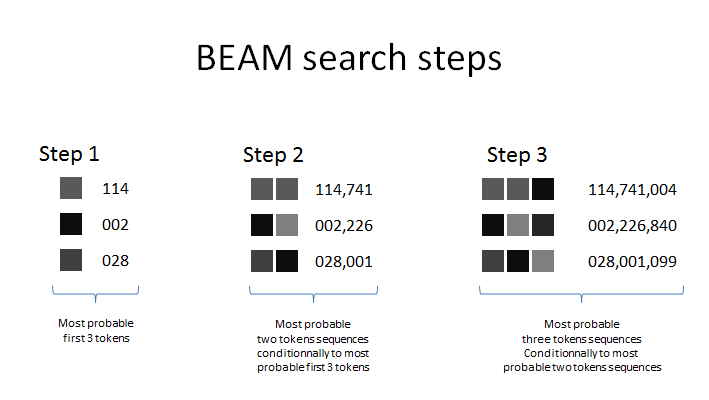

____
# Top-K Sampling

Il s'agit de la méthode suivante :
 0. Mots précédemment prédits en input du modèle    
 1. Sélection des K plus probables mots
 2. Calcul de la nouvelle distribution sur les K mots
 3. On peut ajouter un paramètre qu'on appelle température qui permet d'accentuer ou de smoother la distribution des mots
 4. On tire au hasard dans cette distribution le mot à générer


___

# Top-p Sampling

Il s'agit de la méthode suivante :    
 0. Mots précédemment prédits en input du modèle
 1. Sélection des mots les plus probables de sorte que leur cumulative probabilité soit supérieur à p
 2. Similaire à Top-K sampling

____
# Softmax Temperature

 1. Récupérer les logits
 2. Diviser les logits par la température T
 3. Prendre le softmax des logits divisés